# Predicting Sunspot Frequency with Keras

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity.

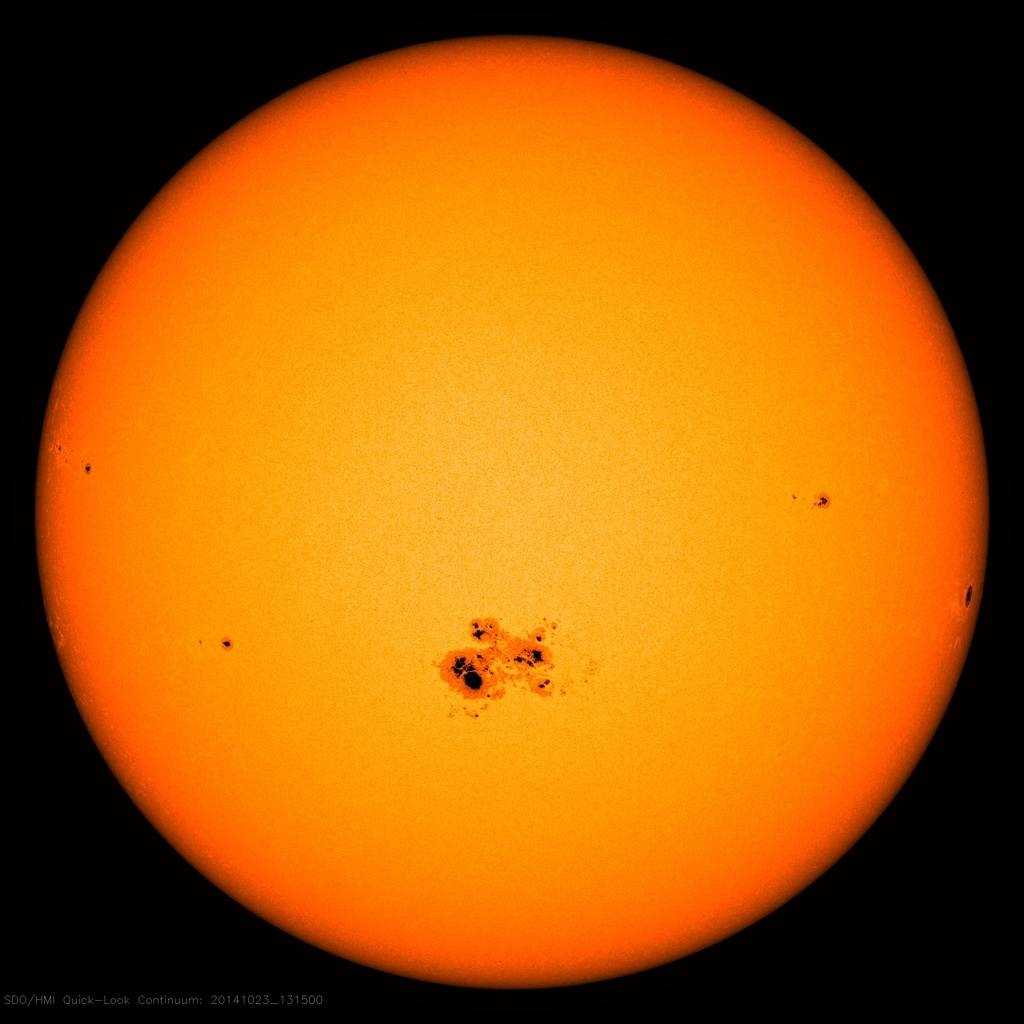

Basically, a sunspot is a spot or patch that appears from time to time on the sun's surface, appearing dark by contrast with its surroundings.

## Importing Libraries & the CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [2]:
sun_spot = pd.read_csv('Sunspots.csv')
sun_spot.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


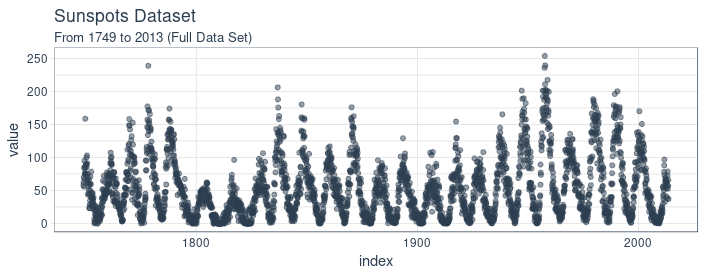

##  Pre-processing the data -

In [3]:
# Because, the dates are in order, we have the liberty of dropping them. Else, we might not be able to do so,
# without sorting.
sun_spot.drop(['Unnamed: 0','Date'],axis=1,inplace=True)
sun_spot.head()

,Monthly Mean Total Sunspot Number
0,96.7
1,104.3
2,116.7
3,92.8
4,141.7


In [4]:
sun_spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 1 columns):
Monthly Mean Total Sunspot Number    3235 non-null float64
dtypes: float64(1)
memory usage: 25.4 KB


In [5]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(sun_spot)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2426 809


In [7]:
def create_dataset(dataset,timestep):
    data_X = []
    data_Y = []
    for i in range(len(dataset)-1-timestep):
        a = dataset[i:i+timestep]
        b = dataset[i+timestep]
        data_X.append(a)
        data_Y.append(b)
    return np.array(data_X),np.array(data_Y)
        

In [8]:
timestep=60
train_x,train_y = create_dataset(train,timestep)
test_x,test_y = create_dataset(test,timestep)

In [9]:
print(train_size)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

2426
(2365, 60, 1)
(748, 60, 1)
(2365, 1)


##  Create,compile and fit the model!

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(timestep,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')            # use MSE as loss function as regression
model.fit(train_x, train_y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 278s - loss: 0.0092
Epoch 2/10
 - 290s - loss: 0.0070
Epoch 3/10
 - 291s - loss: 0.0059
Epoch 4/10
 - 294s - loss: 0.0053
Epoch 5/10
 - 280s - loss: 0.0054
Epoch 6/10
 - 317s - loss: 0.0050
Epoch 7/10
 - 416s - loss: 0.0053
Epoch 8/10
 - 407s - loss: 0.0053
Epoch 9/10
 - 420s - loss: 0.0050
Epoch 10/10
 - 385s - loss: 0.0050


## Predictions-

In [11]:
# make predictions
trainPredict = model.predict(train_x)
testPredict = model.predict(test_x)

In [12]:
# invert predictions as they would have come had we not normalized the data
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
train_y = scaler.inverse_transform(train_y)
test_y = scaler.inverse_transform(test_y)

In [13]:
print(testPredict)

[[157.28856  ]
 [166.88365  ]
 [167.41725  ]
 [186.77481  ]
 [181.67415  ]
 [188.14192  ]
 [211.64633  ]
 [217.53647  ]
 [212.32623  ]
 [226.90683  ]
 [226.94893  ]
 [219.9891   ]
 [206.8724   ]
 [210.80466  ]
 [217.9176   ]
 [215.87616  ]
 [225.08183  ]
 [223.30824  ]
 [214.7711   ]
 [232.28171  ]
 [237.0719   ]
 [231.90927  ]
 [234.8032   ]
 [230.28354  ]
 [221.86069  ]
 [224.16005  ]
 [226.27667  ]
 [222.24088  ]
 [219.43927  ]
 [223.16087  ]
 [225.8743   ]
 [226.47421  ]
 [222.05856  ]
 [212.65189  ]
 [219.03882  ]
 [228.19562  ]
 [212.77856  ]
 [217.94585  ]
 [213.20312  ]
 [213.9229   ]
 [212.93167  ]
 [206.06927  ]
 [220.24915  ]
 [207.21788  ]
 [188.72398  ]
 [185.02824  ]
 [183.81494  ]
 [192.16096  ]
 [175.34712  ]
 [164.85315  ]
 [170.16708  ]
 [169.41437  ]
 [162.76558  ]
 [165.82384  ]
 [173.28156  ]
 [171.46532  ]
 [147.76637  ]
 [140.64891  ]
 [135.02153  ]
 [116.02476  ]
 [ 99.38819  ]
 [ 93.608574 ]
 [ 93.52515  ]
 [ 84.76745  ]
 [ 95.766525 ]
 [ 93.14219  ]
 [ 82.8747

In [14]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(train_y[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 100.22 RMSE
Test Score: 118.33 RMSE


As expected, the model performs better on the train set. It has learnt the mapping in a good way, giving an accuracy of more than 90 percent. 
Probably training the model for even more epochs would give a much better result.But, for the sake of saving time, i  trained it on 10 epochs only.